#1

In [11]:
import numpy as np
from scipy.stats import multivariate_normal


def expectation_step(X, means, covs, pis, k):
    """Compute the posterior probabilities of the clusters for each data point"""

    n, d = X.shape
    likelihoods = np.zeros((n, k))
    posteriors = np.zeros((n, k))

    for j in range(k):
        likelihoods[:, j] = multivariate_normal.pdf(X, mean=means[j], cov=covs[j])

    for j in range(k):
        posteriors[:, j] = pis[j] * likelihoods[:, j]

    posteriors /= np.sum(posteriors, axis=1, keepdims=True)

    return posteriors


def maximization_step(X, posteriors, k):
    """Update the means, covariances, and mixing coefficients for each cluster"""

    n, d = X.shape
    means = np.zeros((k, d))
    covs = np.zeros((k, d, d))
    pis = np.zeros(k)

    for j in range(k):
        Nj = np.sum(posteriors[:, j])
        means[j] = np.sum(X * posteriors[:, j][:, np.newaxis], axis=0) / Nj
        covs[j] = ((X - means[j]) * posteriors[:, j][:, np.newaxis]).T @ (X - means[j]) / Nj
        pis[j] = Nj / n

    return means, covs, pis


def EM(X, k, max_iter=300):
    """Run the EM algorithm for k-finite Gaussian mixture model"""

    n, d = X.shape
    means = np.random.rand(k, d) * np.std(X, axis=0) + np.mean(X, axis=0)
    covs = np.tile(np.diag(np.var(X, axis=0)), (k, 1, 1))
    pis = np.ones(k) / k

    for i in range(max_iter):
        prev_means = means.copy()

        posteriors = expectation_step(X, means, covs, pis, k)
        means, covs, pis = maximization_step(X, posteriors, k)


    return posteriors, means, covs, pis


#2

In [9]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [10]:
data=data.frame

In [12]:
# Import necessary libraries
from sklearn.decomposition import PCA
import pandas as pd

# Load the California Housing dataset


# Extract the features from the dataset
X = data.iloc[:, :-1]

# Initialize the PCA model with n_components = 2
pca = PCA(n_components=2)

# Fit and transform the data to 2 dimensions
X_pca = pca.fit_transform(X)

#3

In [13]:

# Run the EM algorithm for k=2, 3, and 4
for k in range(2, 5):
    posteriors, means, covs, pis = EM(X_pca, k)
    print(f"k={k}:")
    for j in range(k):
        print(f"  Component {j+1}:")
        print(f"    mean: {means[j]}")
        print(f"    covariance:\n{covs[j]}")
        print(f"    mixing coefficient: {pis[j]}")


k=2:
  Component 1:
    mean: [1529.9262268    -3.88427983]
    covariance:
[[3.67057122e+06 8.62033448e+03]
 [8.62033448e+03 1.32492407e+02]]
    mixing coefficient: 0.16137288948079645
  Component 2:
    mean: [-294.39617777    0.74743286]
    covariance:
[[ 2.85809696e+05 -2.95210045e+02]
 [-2.95210045e+02  1.44308449e+02]]
    mixing coefficient: 0.8386271105192035
k=3:
  Component 1:
    mean: [ 3.29119630e+03 -1.39988539e+00]
    covariance:
[[7.46160941e+06 1.77530331e+04]
 [1.77530331e+04 1.97114729e+02]]
    mixing coefficient: 0.04019461755442085
  Component 2:
    mean: [-430.8655809    3.147026 ]
    covariance:
[[1.83631404e+05 2.25984790e+02]
 [2.25984790e+02 1.32408785e+02]]
    mixing coefficient: 0.6431819198281031
  Component 3:
    mean: [457.4410684  -6.215087 ]
    covariance:
[[7.68588418e+05 3.46959190e+03]
 [3.46959190e+03 1.05930253e+02]]
    mixing coefficient: 0.31662346261747604
k=4:
  Component 1:
    mean: [-142.40368645   -4.80758033]
    covariance:
[[3.

#4

k=2: Silhouette Score = 0.7044753859164729
k=3: Silhouette Score = 0.4645934693543115
k=4: Silhouette Score = 0.15310809036633108


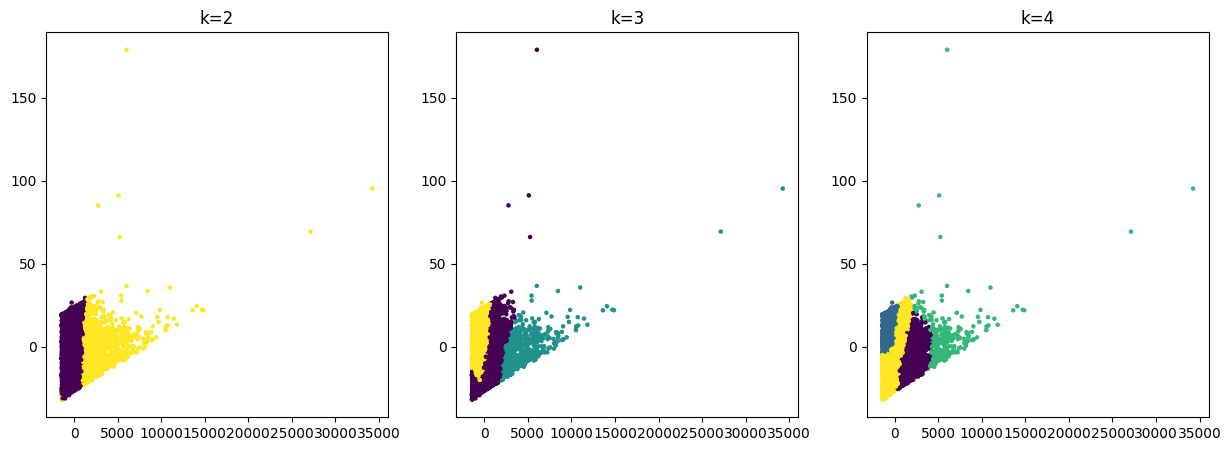

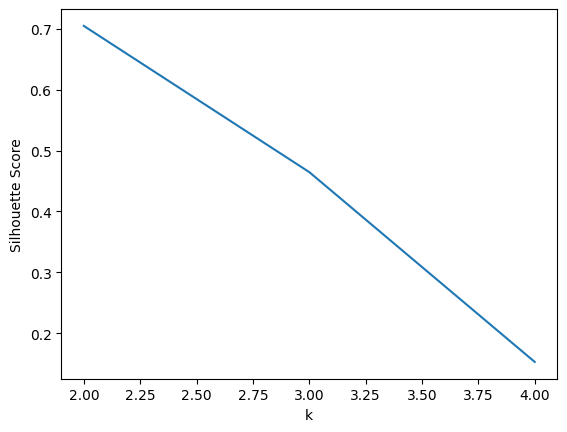

In [14]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Calculate the Silhouette Score for k=2, 3, and 4
silhouette_scores = []
for k in range(2, 5):
    posteriors, _, _, _ = EM(X_pca, k)
    cluster_labels = posteriors.argmax(axis=1)
    score = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(score)
    print(f"k={k}: Silhouette Score = {score}")

# Plot the clusters for k=2, 3, and 4
plt.figure(figsize=(15, 5))
for i, k in enumerate(range(2, 5)):
    posteriors, _, _, _ = EM(X_pca, k)
    cluster_labels = posteriors.argmax(axis=1)
    plt.subplot(1, 3, i+1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=5, cmap='viridis')
    plt.title(f"k={k}")
plt.show()

# Plot the Silhouette Scores
plt.plot(range(2, 5), silhouette_scores)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()


Using Silhoutte score it is evident that the cluster for k=2 is better than other clusters since its silhoutte score is largest.Also it is visible from the plot of k=2 that the clusters have been separated quite well. We see that as k increases the silhoutte score tells us that quality of clusters detoriates.